In [2]:
import sqlite3

# Connect to database (creates if not exists)
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create the sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
)
''')

# New sample data
sales_data = [
    ('Laptop', 2, 55000),
    ('Smartphone', 5, 30000),
    ('Headphones', 10, 1500),
    ('Monitor', 3, 12000),
    ('Keyboard', 8, 700),
    ('Mouse', 12, 500),
    ('Laptop', 1, 55000),
    ('Smartphone', 3, 30000),
    ('Monitor', 2, 12000),
    ('Mouse', 10, 500)
]

# Insert data
cursor.executemany('INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)', sales_data)

# Commit and close
conn.commit()
conn.close()

print("sales data inserted successfully.")


sales data inserted successfully.


Sales Summary:
      product  total_qty   revenue
0       Apple         45     112.5
1      Banana         90      90.0
2  Headphones         20   30000.0
3    Keyboard         16   11200.0
4      Laptop          6  330000.0
5     Monitor         10  120000.0
6       Mouse         44   22000.0
7      Orange         75     112.5
8  Smartphone         16  480000.0


<Figure size 800x600 with 0 Axes>

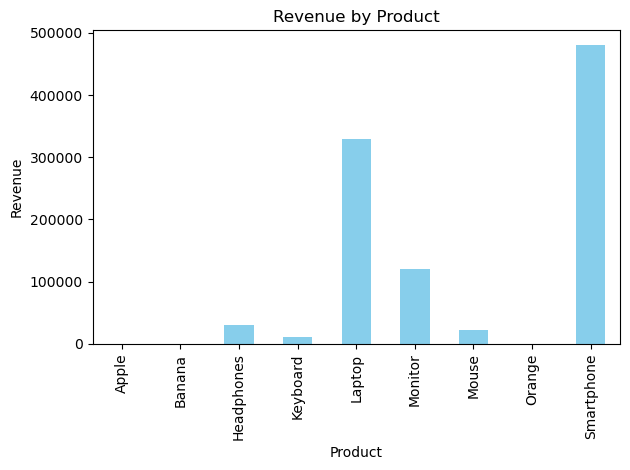

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('sales_data.db')

query = '''
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
'''

df = pd.read_sql_query(query, conn)
conn.close()

print("Sales Summary:")
print(df)

plt.figure(figsize=(8, 6))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()
